# Importing libraries, loading Dataset, and defining x/y.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_excel("./Real estate valuation data set.xlsx")
del raw_df['No']
del raw_df['X1 transaction date']

X=raw_df.iloc[:,:-1].values
y=raw_df.iloc[:,-1].values

# Splitting the dataset into Training and Test sets.

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Creating a Standardized dataset and a Normalized dataset.

We will compare both of these against each other and the raw dataset as a baseline.

Standardized dataset:

In [117]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()

std_X_train = std_sc.fit_transform(X_train)
std_X_test = std_sc.transform(X_test)

Normalized dataset:

In [118]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

norm_X_train = norm.fit_transform(X_train)
norm_X_test = norm.transform(X_test)

# Performing PCA.

Text(0, 0.5, 'Variance')

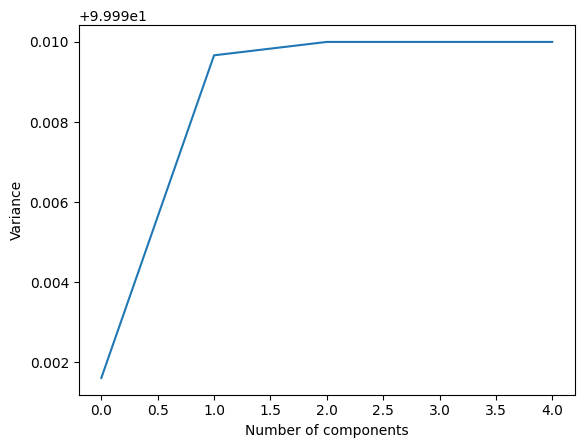

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components = len(X_train[0]), random_state=0) 
temp_pca = pca.fit_transform(X_train)
temp_pca = pca.transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')

Text(0, 0.5, 'Variance')

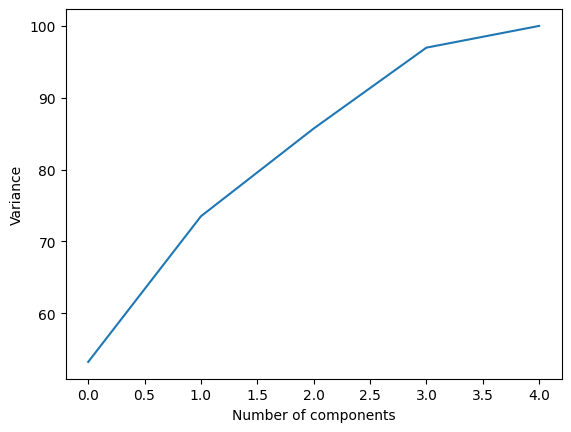

In [120]:
pca = PCA(n_components = len(X_train[0]), random_state=0)
temp_pca = pca.fit_transform(std_X_train)
temp_pca = pca.transform(std_X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')

Text(0, 0.5, 'Variance')

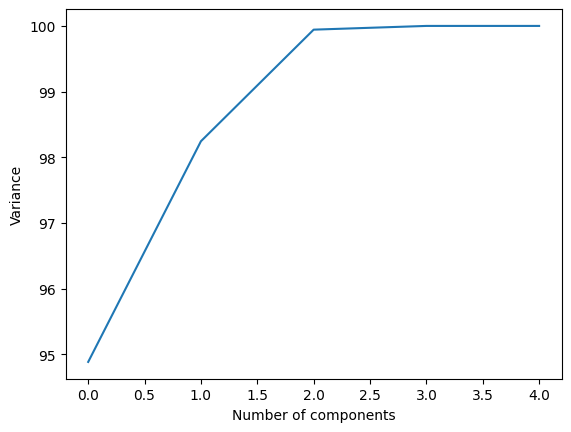

In [121]:
pca = PCA(n_components = len(X_train[0]), random_state=0)
temp_pca = pca.fit_transform(norm_X_train)
temp_pca = pca.transform(norm_X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')

In [122]:
from sklearn.decomposition import PCA

#Raw data
raw_pca = PCA(n_components=2, random_state=0)
raw_X_train = raw_pca.fit_transform(X_train)
raw_X_test = raw_pca.transform(X_test)
print(sum(raw_pca.explained_variance_ratio_ * 100))

#Standardized data
std_pca = PCA(n_components=2)
std_X_train = std_pca.fit_transform(std_X_train)
std_X_test = std_pca.transform(std_X_test)
print(sum(std_pca.explained_variance_ratio_ * 100))

#Normalized data
norm_pca = PCA(n_components=2)
norm_X_train = norm_pca.fit_transform(norm_X_train)
norm_X_test = norm_pca.transform(norm_X_test)
print(sum(norm_pca.explained_variance_ratio_ * 100))

99.99966533440927
73.49063042239908
98.24436485636485


Text(0, 0.5, 'Variance')

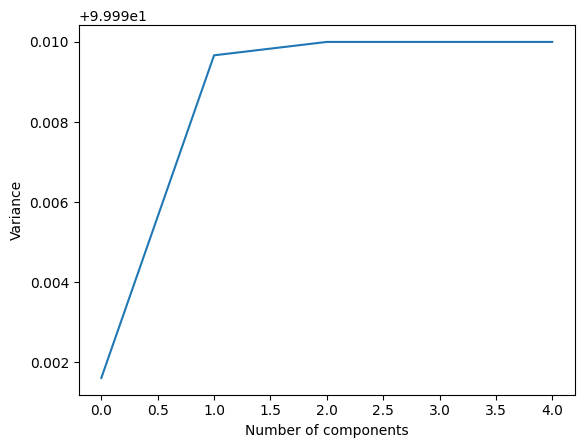

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components = len(X_train[0]), random_state=0) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')